## The Data

What kind of data do we need

In [1]:
source = [0, 0, 1, 1, 0]
target = [2, 3, 4, 5, 4]
value = [8, 2, 2, 8, 4]

## Most basic Sankey diagram with `Plotly`

Once that we have the data, the first step is to load the library

In [2]:
import plotly.graph_objects as go

Now let's use it to plot the Sanke

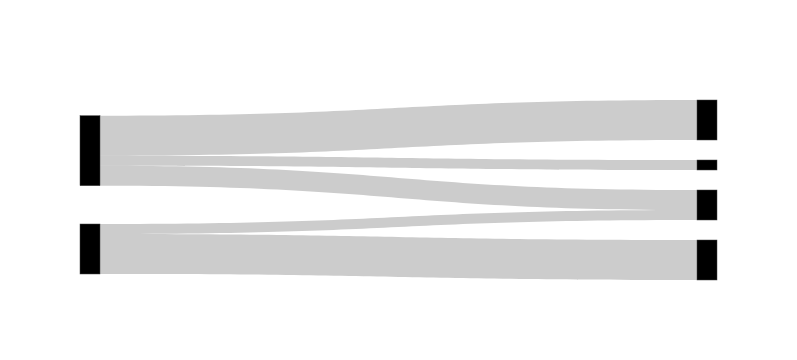

In [3]:
link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link)

fig = go.Figure(data)

fig.show()

Note that you can save this chart to a standalone file thanks to the write.html() function. It is then possible to render it in any html document using an `iframe`

In [4]:
# If you need to save this file as a standalong html file:
fig.write_html("../../static/interactiveCharts/sankey-diagram-plotly1.html")

In [6]:
%%html
<iframe src="../../interactiveCharts/sankey-diagram-plotly1.html" width="800" height="600" title="ridgeline chart with plotly" style="border:none"></iframe>

## Basic customization

This section needs to be edited. Sorry for the inconvenience 😔

## Real life Sankey diagram

This is the example coming from the [plotly documentation](https://plotly.com/python/sankey-diagram/), in order to see how plotly behaves with a real life dataset!

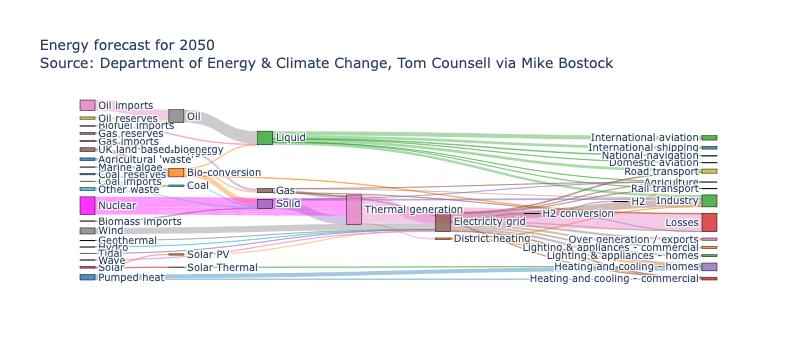

In [8]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

Save the figure in html format

In [9]:
# If you need to save this file as a standalong html file:
fig.write_html("../../static/interactiveCharts/sankey-diagram-plotly-real.html")

Render it as an iframe

In [10]:
%%html
<iframe src="../../interactiveCharts/sankey-diagram-plotly-real.html" width="800" height="900" title="ridgeline chart with plotly" style="border:none"></iframe>